In [5]:
from __future__ import print_function
__author__= 'fbb - modified by dlk253 for the purposed of the assignment'
import numpy as np
import pylab as pl
# this package sets up pretty plots
from scipy.optimize import curve_fit, minimize
    
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [6]:
#distributions = ['pois', 'gaus', 'chisq', 'cauchy', 'lnorm', 'binomial']
distributions = ['chisq','pois', 'gaus', 'cauchy', 'lnorm', 'binomial' ]

In [17]:
np.random.seed(999999)
mymean = 100

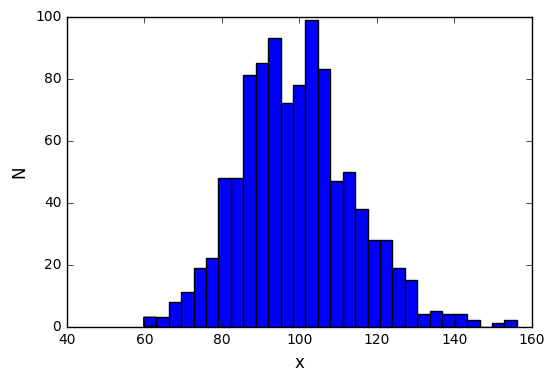

In [18]:
df = mymean
md = {}
md['chisq'] = np.random.chisquare(mymean, 1000)
pl.hist(md['chisq'], bins = 30)
pl.ylabel("N", fontsize = 12)
pl.xlabel("x", fontsize = 12)


In [19]:
print ("Chisq mean: %.2f, standard deviation: %.2f"%(md['chisq'].mean(), md['chisq'].std()))


Chisq mean: 99.34, standard deviation: 14.72


In [20]:
mysize = (2000 / (np.array(range(1, 101)))).astype(int)

In [21]:
print (mysize, mysize.shape)



[2000 1000  666  500  400  333  285  250  222  200  181  166  153  142  133
  125  117  111  105  100   95   90   86   83   80   76   74   71   68   66
   64   62   60   58   57   55   54   52   51   50   48   47   46   45   44
   43   42   41   40   40   39   38   37   37   36   35   35   34   33   33
   32   32   31   31   30   30   29   29   28   28   28   27   27   27   26
   26   25   25   25   25   24   24   24   23   23   23   22   22   22   22
   21   21   21   21   21   20   20   20   20   20] (100,)


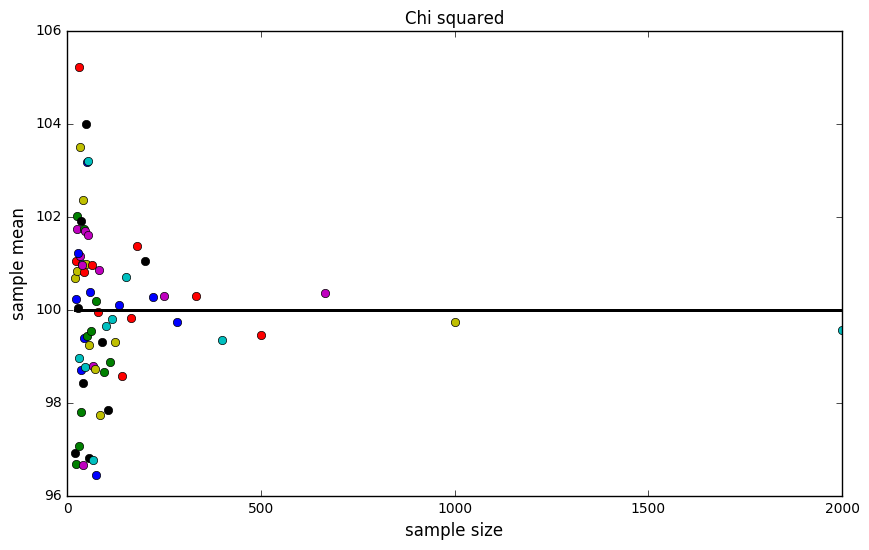

In [15]:
md['chisq'] = {} 

#and do it in a for loop. not pythonic, but easily readable

for n in mysize:
    md['chisq'][n] = np.random.chisquare(df, size = n)

md['chisq']['means'] = {}
axchisq_mu_n = pl.figure(figsize=(10,6)).add_subplot(111)

for nn in md['chisq']:
    if not type(nn) == str:
        md['chisq']['means'][nn] = md['chisq'][nn].mean()
        #and plot it
        axchisq_mu_n.plot(nn, md['chisq']['means'][nn], 'o')
        axchisq_mu_n.set_xlabel('sample size', fontsize=12)
        axchisq_mu_n.set_ylabel('sample mean', fontsize=12)
        axchisq_mu_n.set_title('Chi squared', fontsize=12)
        axchisq_mu_n.plot([min(mysize), max(mysize)], [df, df], 'k')

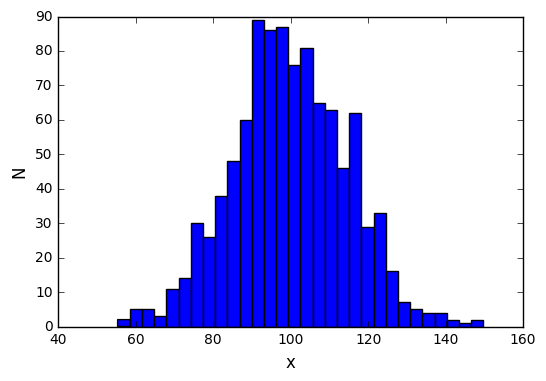

In [23]:
sd = 15
md['norm'] = np.random.normal(mymean, sd, 1000)

pl.hist(md['norm'], bins = 30)
pl.ylabel('N',fontsize=12)
pl.xlabel('x',fontsize=12)

In [50]:
#attempt at normal distro....taken from scipy.org example that i found online by googling, and then changed some numbers around
#not sure if the numbers are correct, am using 100 as the mean and 0.2 as the standard deviation based on the sample from above.
mu, sigma = 100, 0.2 # mean and standard deviation
s = np.random.normal(mu, sigma, 1000)

In [51]:
abs(mu - np.mean(s)) < 0.01
True


True

In [52]:
abs(sigma - np.std(s, ddof=1)) < 0.01
True

True

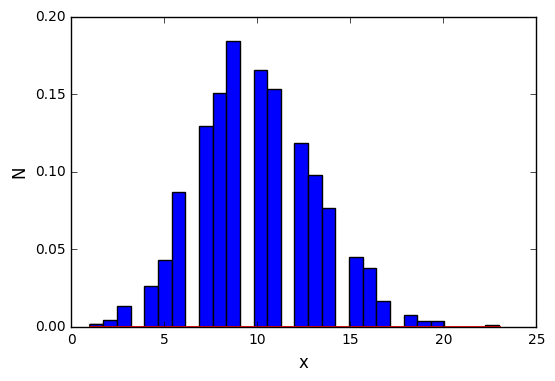

In [55]:
import matplotlib.pyplot as plt
count, bins, ignored = plt.hist(s, 30, normed=True)
plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *
                np.exp( - (bins - mu)**2 / (2 * sigma**2) ),
          linewidth=2, color='r')
pl.ylabel('N',fontsize=12)
pl.xlabel('x',fontsize=12)

plt.show()


In [54]:
#Poisson Distribution: taken from the scipy.org reference with the numbers changed
s = np.random.poisson(10, 2000)


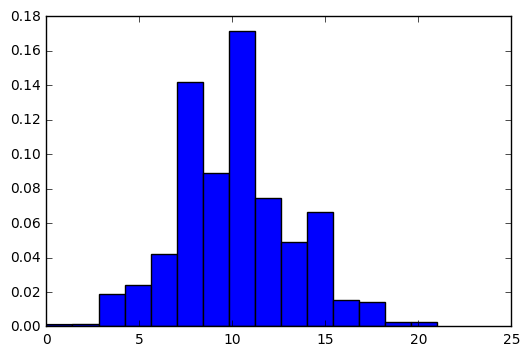

In [26]:

count, bins, ignored = plt.hist(s, 15, normed=True)
plt.show()


In [25]:
#Binomial Distribution: taken from the scipy.org reference with the numbers changed

In [28]:
n, p = 10, .5  # number of trials, probability of each trial
s = np.random.binomial(n, p, 2000)
# result of flipping a coin 10 times, tested 1000 times.


In [29]:
sum(np.random.binomial(20, 0.1, 2000) == 0)/2000.
# answer = 0.38885, or 38%.

0.128

In [30]:
#cauchy distribution: taken from the scipy.org reference with the numbers changed

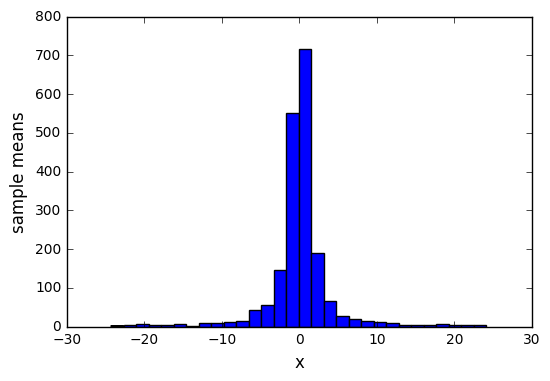

In [62]:
s = np.random.standard_cauchy(2000)
s = s[(s>-25) & (s<25)]  # truncate distribution so it plots well
plt.hist(s, bins=30)
pl.ylabel('x',fontsize=12)
pl.xlabel('sample size',fontsize=12)
plt.show()

In [32]:
#Extra Credit attempt at Gaussian

In [33]:
from matplotlib import pyplot as mp
import numpy as np



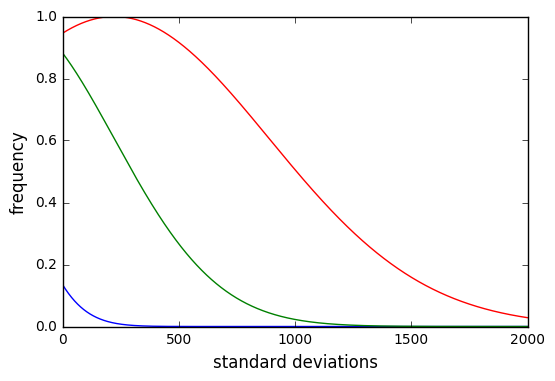

In [60]:
def gaussian(x, mu, sig):
    return np.exp(-np.power(x - mu, 2.) / (2 * np.power(sig, 2.)))

for mu, sig in [(-1, 1), (0, 2), (2, 3)]:
    mp.plot(gaussian(np.linspace(1,10,2000), mu, sig))
pl.ylabel('frequency',fontsize=12)
pl.xlabel('standard deviations',fontsize=12)
mp.show()